# Content

1. [Load Data](#1)
2. [Separating Data into Test and Training Set](#2)
3. [Modeling](#3)
    - 3.1 [First Evaluation of Different Models](#4)
    - 3.2 [Area Under the Curve (AUC) and ](#5)
    - 3.3 [Random Forest Hyperparameter](#6)
4. [Artificial Neural Network](#7)

## 1. Load Data<a name = 1></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/diabetes_clean_scaled.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.842406,0.968697,-0.019559,0.740160,1.377079,0.270163,0.852460,1.399009,1
1,-0.849975,-1.474492,-0.593325,0.045089,-1.289791,-0.917294,-0.182884,0.121670,0
2,1.246532,1.750139,-0.783908,0.233018,0.795782,-1.556530,0.972625,0.226764,1
3,-0.849975,-1.254536,-0.593325,-0.679244,-0.628768,-0.645419,-1.343867,-1.474295,0
4,-1.592118,0.654682,-1.919628,0.740160,0.471166,1.623697,1.787773,0.325504,1
...,...,...,...,...,...,...,...,...,...
763,1.586906,-0.666332,0.364544,1.740139,0.606021,0.159936,-1.312374,1.685355,0
764,-0.356029,0.167825,-0.211141,-0.192741,-0.048756,0.753933,-0.238567,-0.376157,0
765,0.606143,0.132554,-0.019559,-0.679244,-0.303459,-0.991644,-0.785753,0.009595,0
766,-0.849975,0.305156,-1.164009,-0.168805,0.297337,-0.298674,-0.192903,1.266248,1


## 2. Separating Data into Test and Training Set<a name = 2></a>

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [6]:
X.shape

(768, 8)

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.842406,0.968697,-0.019559,0.740160,1.377079,0.270163,0.852460,1.399009
1,-0.849975,-1.474492,-0.593325,0.045089,-1.289791,-0.917294,-0.182884,0.121670
2,1.246532,1.750139,-0.783908,0.233018,0.795782,-1.556530,0.972625,0.226764
3,-0.849975,-1.254536,-0.593325,-0.679244,-0.628768,-0.645419,-1.343867,-1.474295
4,-1.592118,0.654682,-1.919628,0.740160,0.471166,1.623697,1.787773,0.325504


In [8]:
y.shape

(768,)

In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 3. Modelling<a name =3></a>

### 3.1 First Evaluation of Different Models<a name = 4></a>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=10000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Train each classifier on the scaled data and record their test accuracies
results = []
for name, clf in classifiers:
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy and append to results
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy'])

results_df.sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
0,Logistic Regression,0.759740
2,Random Forest,0.759740
5,Gradient Boosting,0.759740
3,SVM,0.753247
4,KNN,0.733766
1,Decision Tree,0.727273


### 3.2 Area Under the Curve (AUC)<a name = 5></a>



In [12]:
from sklearn.metrics import roc_auc_score

# Extract classifiers excluding SVM for AUC computation
classifiers_without_svm = [clf for clf in classifiers if clf[0] != 'SVM']

# Compute AUC for each classifier
auc_results_without_svm = []
for name, clf in classifiers_without_svm:
    # Get the probability scores for the positive class
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Compute AUC and append to results
    auc = roc_auc_score(y_test, y_prob)
    auc_results_without_svm.append((name, auc))

# Convert results to a DataFrame
auc_results_df_without_svm = pd.DataFrame(auc_results_without_svm, columns=['Classifier', 'AUC'])

auc_results_df_without_svm.sort_values(by='AUC', ascending=False)

,Classifier,AUC
2,Random Forest,0.849311
0,Logistic Regression,0.817815
4,Gradient Boosting,0.811938
3,KNN,0.798531
1,Decision Tree,0.707071


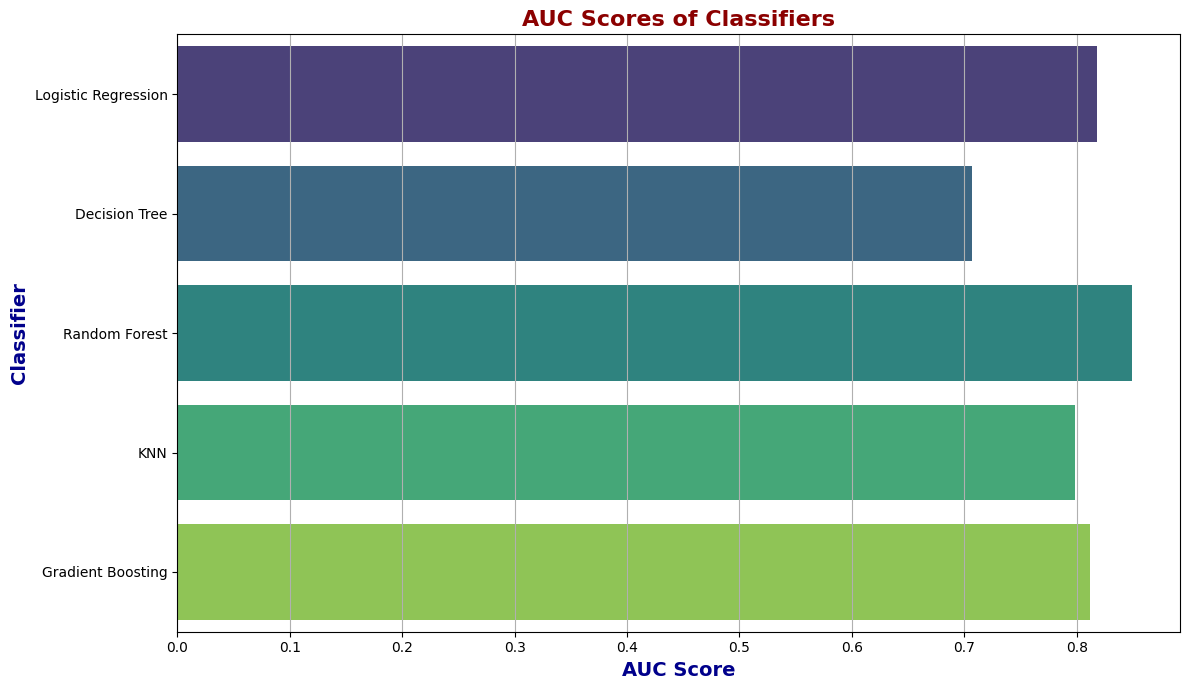

In [13]:
title_font = {"color" : "darkred", "weight" : "bold", "size" : 16}
axis_font = {"color" : "darkblue", "weight" : "bold", "size" : 14}

plt.figure(figsize=(12, 7))
sns.barplot(x='AUC', y='Classifier', data=auc_results_df_without_svm, palette='viridis')
plt.title('AUC Scores of Classifiers', fontdict=title_font)
plt.xlabel('AUC Score', fontdict=axis_font)
plt.ylabel('Classifier', fontdict=axis_font)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

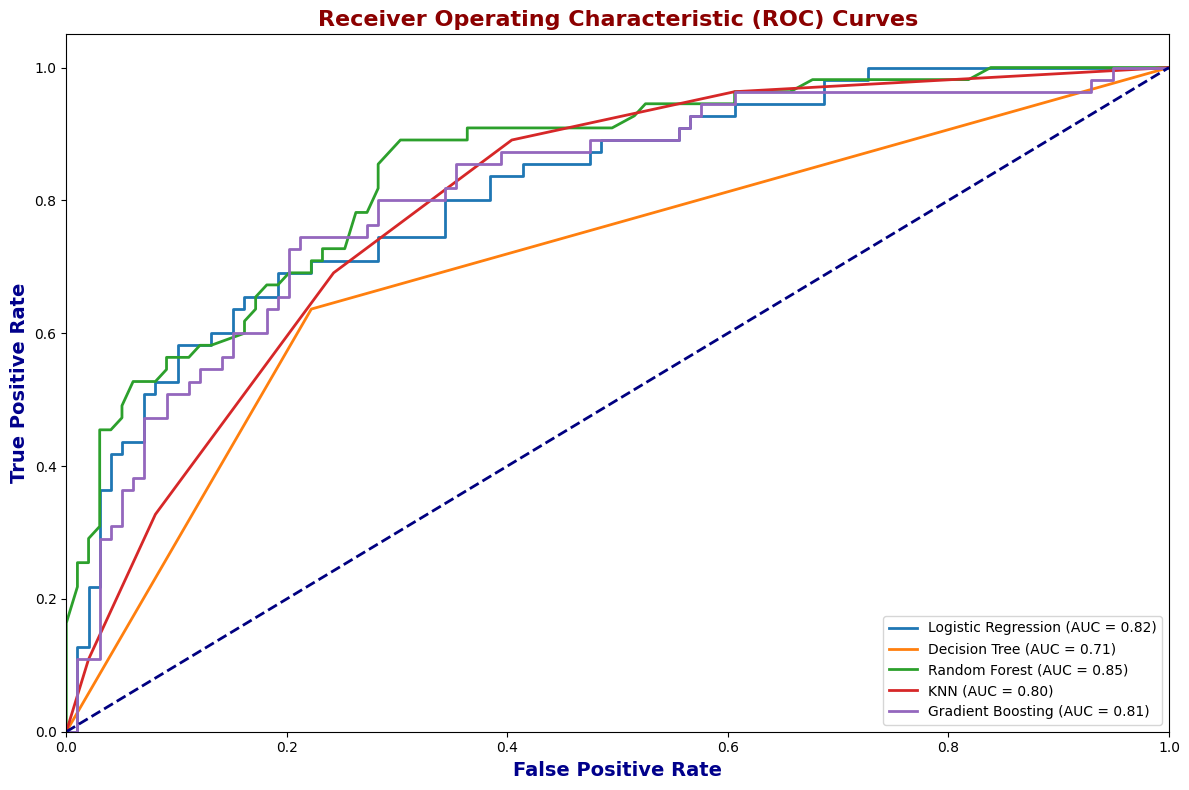

In [14]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 8))

# Plot the ROC curve for each classifier
for name, clf in classifiers_without_svm:
    # Get the probability scores for the positive class
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Setting plot details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontdict=axis_font)
plt.ylabel('True Positive Rate', fontdict=axis_font)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontdict=title_font)
plt.legend(loc="lower right")
# plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

- **Random Forest** has the highest AUC, closely followed by **Logistic Regression** and **Gradient Boosting**.
- **Decision Tree** has the lowest curve, aligning with its AUC score as seen earlier.

### 3.3 Random Forest Hyperparameters<a name = 6></a>

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [16]:
random_forest2 = RandomForestClassifier(random_state=42)
random_forest2

RandomForestClassifier(random_state=42)

In [17]:
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(randint(1, 20).rvs(10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

In [18]:
n_iter_search = 100
random_search = RandomizedSearchCV(estimator=random_forest2,
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42)

In [19]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 6, 17, 16, 7, 16,
                                                      19, 14, 2, 10, 3],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a2fdea0bc70>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a2fdacddc00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a2fdad64df0>},
                   random_state=42, verbose=2)

In [20]:
best_params = random_search.best_params_
print(best_params)

{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 17}


In [21]:
random_forest_hyper = RandomForestClassifier(**best_params, random_state = 42)
random_forest_hyper

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=6,
                       min_samples_split=6, n_estimators=17, random_state=42)

In [22]:
random_forest_hyper.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=6,
                       min_samples_split=6, n_estimators=17, random_state=42)

In [23]:
y_pred_rf_hyper = random_forest_hyper.predict(X_test)

In [24]:
print("The test accuracy score of the Random Forest after hyperparameters tuning is: {}".format(accuracy_score(y_test, y_pred_rf_hyper)))
accuracy_rf_hyper = accuracy_score(y_test, y_pred_rf_hyper)

The test accuracy score of the Random Forest after hyperparameters tuning is: 0.7662337662337663


In [25]:
# Predict the probabilities for the positive class
y_prob_rf_hyper = random_forest_hyper.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_rf_hyper = roc_auc_score(y_test, y_prob_rf_hyper)
print("AUC:", auc_rf_hyper)

AUC: 0.844811753902663


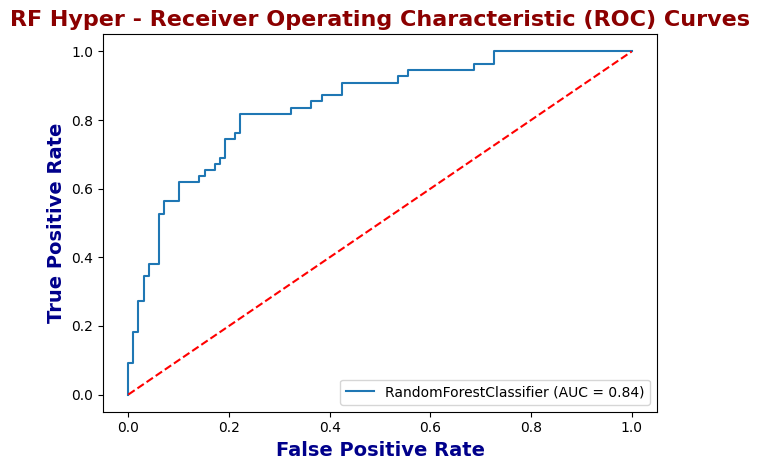

In [26]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(random_forest_hyper, X_test, y_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel('False Positive Rate', fontdict=axis_font)
plt.ylabel('True Positive Rate', fontdict=axis_font)
plt.title('RF Hyper - Receiver Operating Characteristic (ROC) Curves', fontdict=title_font)
plt.legend(loc="lower right")
# plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

In [27]:
rf_results = {
    'Model': ['Random Forest', 'Random Forest Hyper'],
    'Accuracy': [0.759740, accuracy_rf_hyper],
    'AUC': [0.849311, auc_rf_hyper]
}

# Creating a DataFrame from the results
results_rf = pd.DataFrame(rf_results)

results_rf

,Model,Accuracy,AUC
0,Random Forest,0.759740,0.849311
1,Random Forest Hyper,0.766234,0.844812


The model improved the Accuracy from 0.76 to 0.81 when working with the hyperparameter. The AUC kept more or less the same value.

## 4. Artificial Neural Network<a name = 7></a>

In [28]:
!pip install tensorflow
import tensorflow as tf

ANN_model = tf.keras.models.Sequential()
ANN_model.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(8, )))
ANN_model.add(tf.keras.layers.Dropout(0.2))

ANN_model.add(tf.keras.layers.Dense(units=400, activation='relu'))
ANN_model.add(tf.keras.layers.Dropout(0.2))

ANN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [29]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               3600      
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                                 
Total params: 164401 (642.19 KB)
Trainable params: 164401 (642.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
ANN_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [31]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
20/20 [==============================] - 1s 5ms/step - loss: 0.5199 - accuracy: 0.7199
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4437 - accuracy: 0.7687
Epoch 3/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4358 - accuracy: 0.7899
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4202 - accuracy: 0.7818
Epoch 5/200
20/20 [==============================] - 0s 6ms/step - loss: 0.4196 - accuracy: 0.7980
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4231 - accuracy: 0.7883
Epoch 7/200
20/20 [==============================] - 0s 9ms/step - loss: 0.4134 - accuracy: 0.7964
Epoch 8/200
20/20 [==============================] - 0s 10ms/step - loss: 0.4182 - accuracy: 0.7997
Epoch 9/200
20/20 [==============================] - 0s 6ms/step - loss: 0.4006 - accuracy: 0.8111
Epoch 10/200
20/20 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.8143
Epoch 11

In [32]:
y_pred_ANN = ANN_model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [33]:
y_pred_ANN

array([[9.99995470e-01],
       [1.30161379e-05],
       [1.98114902e-09],
       [9.57800737e-08],
       [9.99675274e-01],
       [7.94514298e-01],
       [1.28259466e-17],
       [9.99943316e-01],
       [1.94613695e-01],
       [9.04468238e-01],
       [1.69634931e-02],
       [9.99997199e-01],
       [7.67383724e-03],
       [5.85729443e-03],
       [2.39667123e-11],
       [2.69034615e-07],
       [4.34539179e-05],
       [2.08100759e-09],
       [9.96708333e-01],
       [1.79411948e-01],
       [8.66599500e-01],
       [3.91214700e-11],
       [1.05432282e-05],
       [4.92074204e-09],
       [8.74772370e-01],
       [9.99272168e-01],
       [7.60683358e-01],
       [4.54200994e-13],
       [2.56059129e-09],
       [8.28171440e-04],
       [9.99951899e-01],
       [9.97271955e-01],
       [9.97540355e-01],
       [8.58057737e-01],
       [9.15724874e-01],
       [9.28266287e-01],
       [5.19664288e-01],
       [7.44849324e-01],
       [1.29279884e-04],
       [1.23663940e-01],


In [34]:
y_pred_ANN = (y_pred_ANN > 0.5)

In [35]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

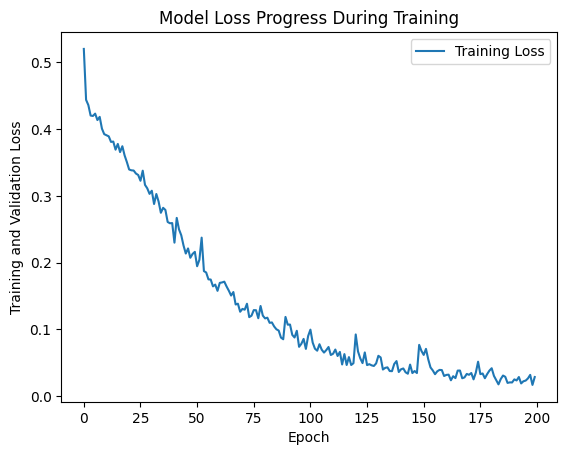

In [36]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss']);

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        99
           1       0.56      0.56      0.56        55

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



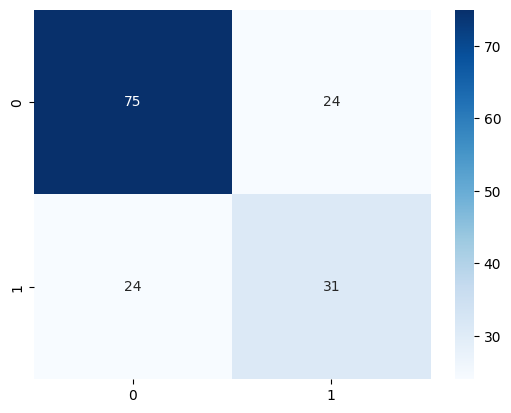

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_ANN)

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Print classification report
print(classification_report(y_test, y_pred_ANN))